## Load the Data

In [6]:
#@title Default title text
from google.colab import files

uploaded = files.upload()

Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv


In [0]:
import pandas as pd
import numpy as np

In [0]:
import io

df_2015 = pd.read_csv(io.StringIO(uploaded['2015.csv'].decode('utf-8')))








## Dataset Cleansing



#### Combine three datasets into one and create new column Year

In [0]:
df_2015.drop('Standard Error', axis=1, inplace=True)


In [21]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## EDA

### Correlation heatmap 

In [0]:
import seaborn as sns

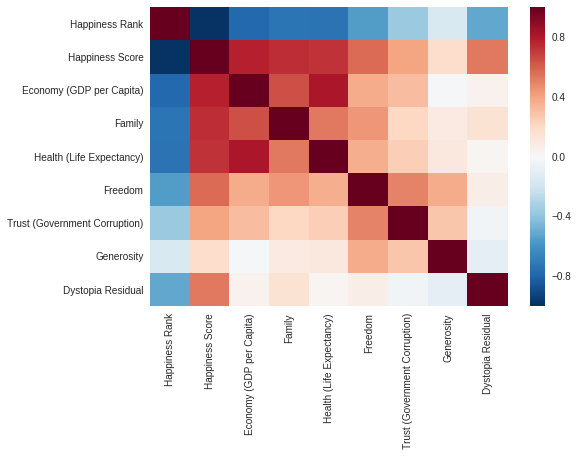

In [23]:
corr = df_2015.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Text(0.5, 1.0, '2015')

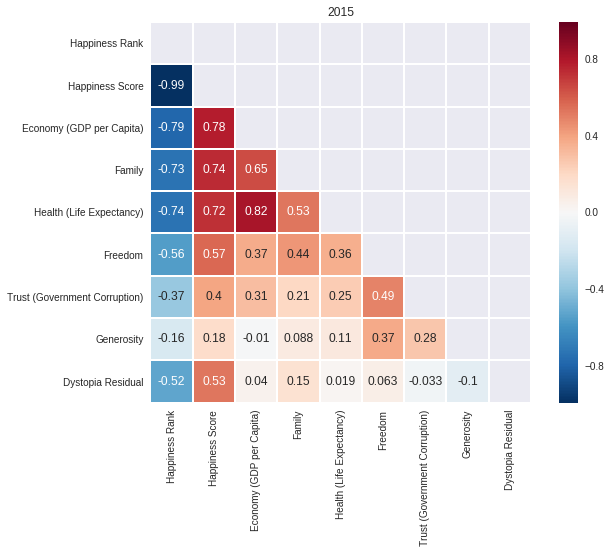

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 7))
corr = df_2015.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,linewidths=1,annot=True, mask=mask, vmax=.3, square=True)
axes.set_title("2015")

### Faceted Plot
packages and code: https://plot.ly/python/facet-plots/

In [0]:
!pip -q install ggplot


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

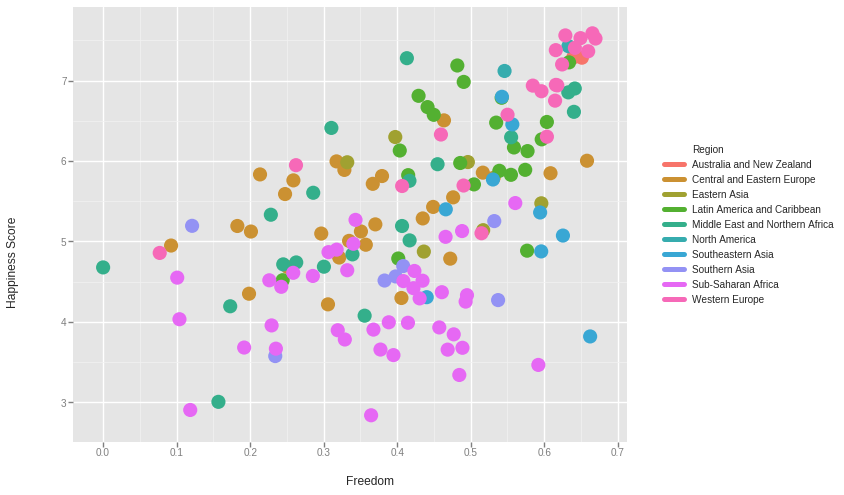

<ggplot: (8784175663701)>

In [35]:
from ggplot import *
ggplot(df_2015, aes(x="Freedom", y="Happiness Score",
                               color="Region")) + geom_point(size=200)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

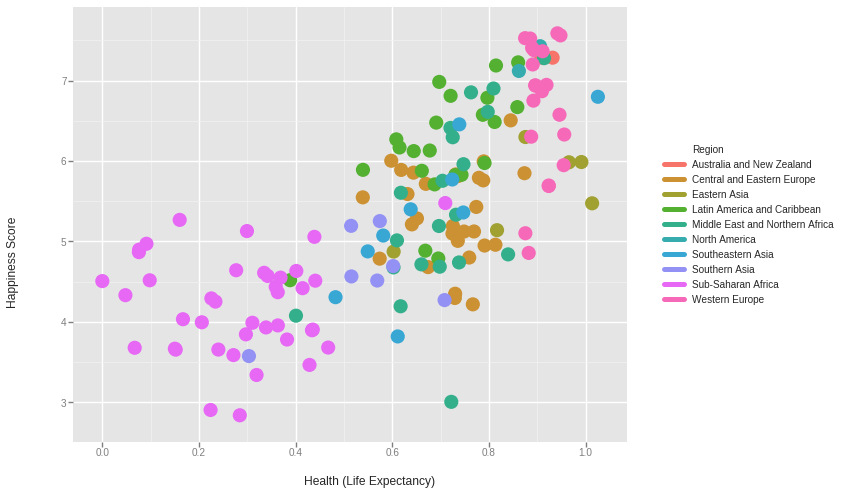

<ggplot: (-9223363252679112146)>

In [34]:
from ggplot import *
ggplot(df_2015, aes(x="Health (Life Expectancy)", y="Happiness Score",
                               color="Region")) + geom_point(size=200)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

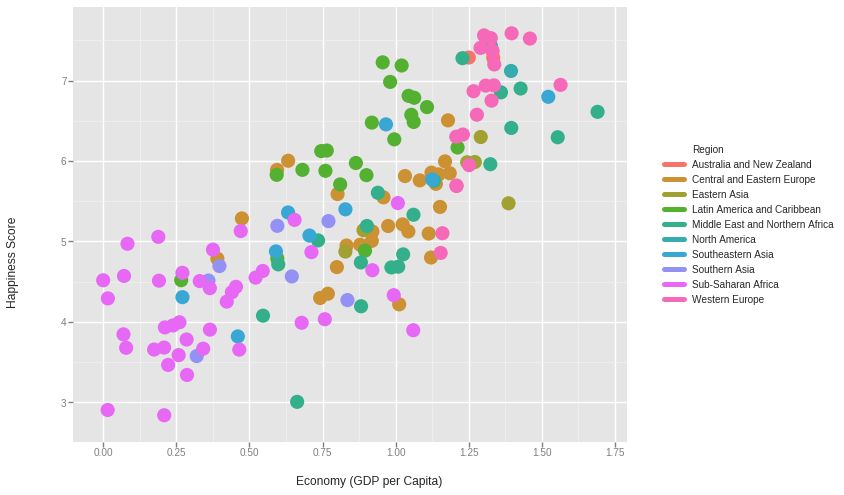

<ggplot: (-9223363252679208988)>

In [36]:
from ggplot import *
ggplot(df_2015, aes(x="Economy (GDP per Capita)", y="Happiness Score",
                               color="Region")) + geom_point(size=200)

In [0]:
import matplotlib.pyplot as plt

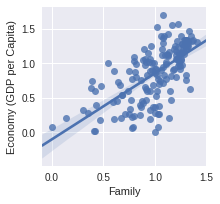

In [38]:
g = sns.FacetGrid(df_2015) 
g.map(sns.regplot, "Family","Economy (GDP per Capita)")
g.add_legend()

###Pairplot

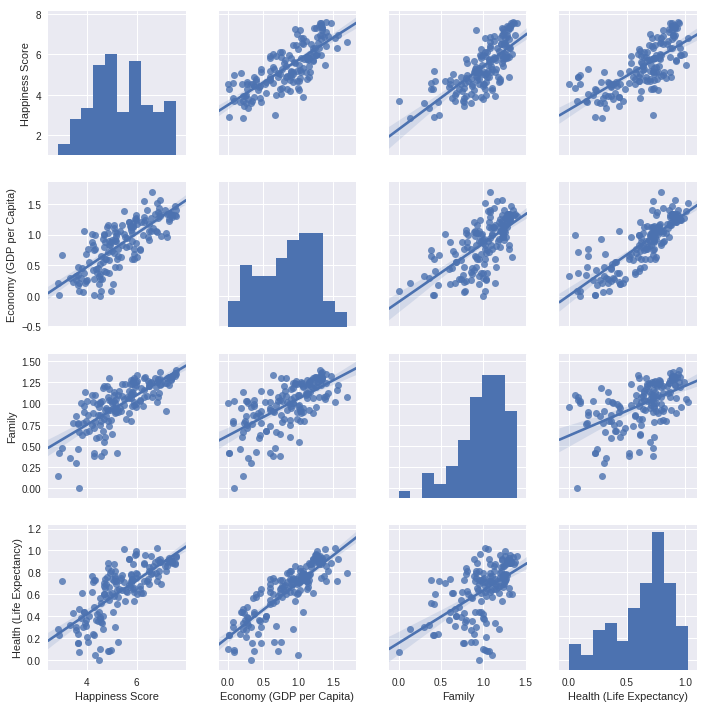

In [99]:
g = sns.pairplot(df_2015[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)']],kind = "reg")

## Create Training and Test *Set*

Drop the Happiness Rank from training datasets since it is perfectly correlated with Happiness Score.

In [0]:
df_2015 = df_2015.drop(columns = ['Happiness Rank'],axis = 1)


In [76]:
df_2015.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Machine Learning Model 

### Linear Model

In [77]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

feature_col_names=["Economy (GDP per Capita)",'Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
score=['Happiness Score']

X = df_2015[feature_col_names].values
y =df_2015[score].values
split_size=0.3

X_train, X_test,y_train,y_test= train_test_split(X,y ,test_size=split_size)

#training
mlregr=linear_model.LinearRegression()
mlregr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Coefficients: ", mlregr.coef_)
print("Intercepts:  " , mlregr.intercept_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))
#for i in range(len(y_test)):
   
  #  print ("Actual:" ,y_test[i] ," Predicted with linear regression:" ,y_pred[i])

Coefficients:  [[1.00005911 1.00001636 0.99989668 0.99954056 1.00011341 1.0001172
  1.00003021]]
Intercepts:   [7.65904635e-05]
Mean squared error: 2.79
Variance score: -1.16


In [0]:
#predicting
y_pred= mlregr.predict(X_test)


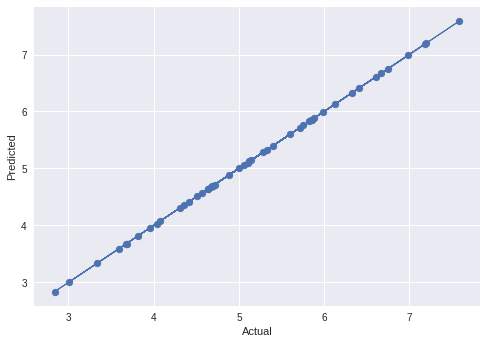

In [80]:
plt.scatter(y_test,y_test)
plt.plot(y_test,y_pred,linewidth=1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

###SVM


In [81]:
from sklearn import svm

svr= svm.SVR(gamma='scale')
svr.fit(X,y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_svr=svr.predict(X_test)

In [83]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred_svr))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred_svr))

Mean squared error: 0.02
Variance score: 0.99


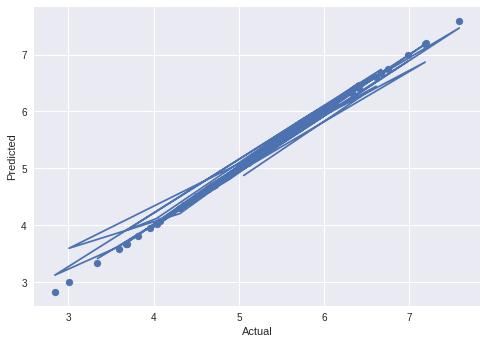

In [85]:
#Plotting Predicted vs Actual Happiness Score

plt.scatter(y_test,y_test)
plt.plot(y_test,y_pred_svr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()